In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('../data/processed/data.csv')

In [14]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Royal Enfield Bullet Electra 350cc 2011,2011,38998.0,first,bangalore,40.0,19.80,95000.0
1,Jawa Perak 330cc 2020,2020,2000.0,first,bangalore,NaN,30.00,197500.0
2,Hero CD Dawn 100cc 2005,2005,28000.0,first,ghaziabad,72.0,7.00,9000.0
3,KTM Duke 200cc 2012,2012,24561.0,third,bangalore,35.0,25.00,63400.0
4,TVS Apache RTR 200 4V Dual Channel ABS BS6 2020,2020,NaN,first,hyderabad,40.0,20.21,130500.0


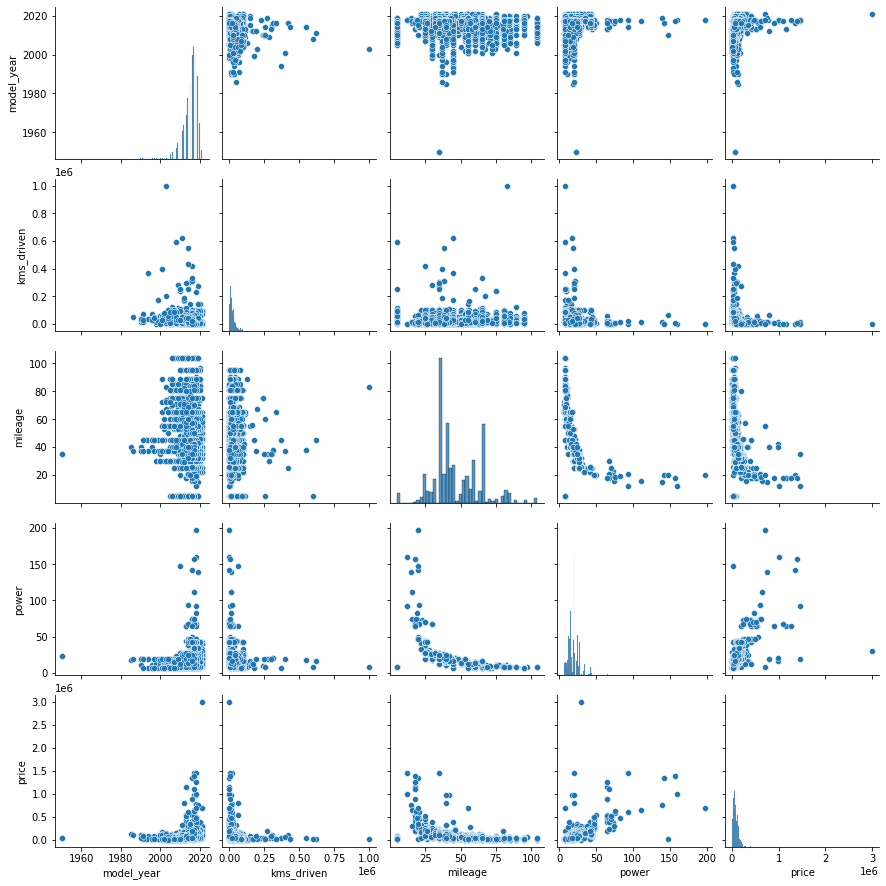

In [15]:
sns.pairplot(data=df)

## Distrubutaion of Numeric Columns

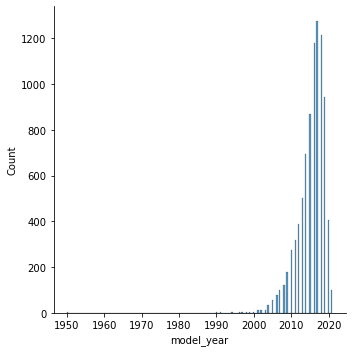

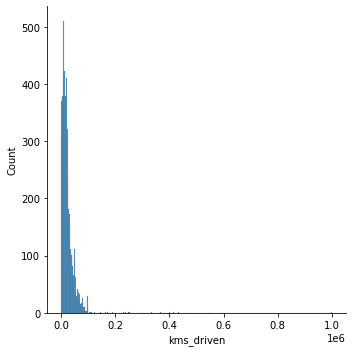

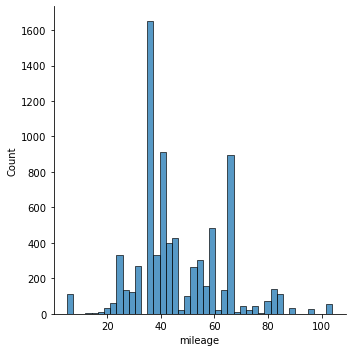

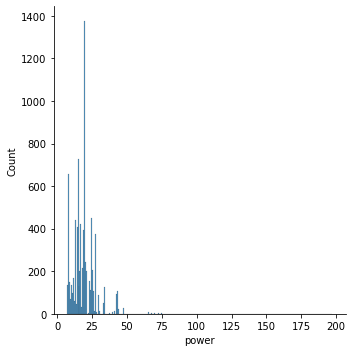

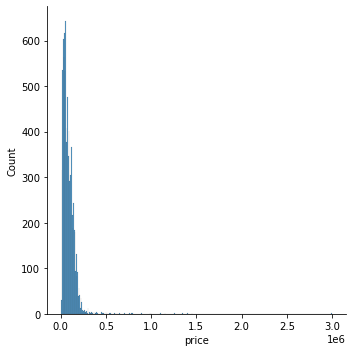

In [16]:
def plot_dist(df, col):
    my_df = df.copy()

    sns.displot(my_df[col])

for col in df.select_dtypes(include=['int','float']).columns:
    plot_dist(df,col)

## Scatter Plots

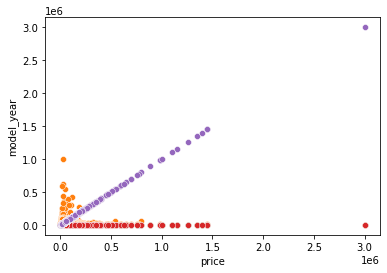

In [17]:
def scater_plot(df, col):
    my_df = df.copy()

    sns.scatterplot(y=my_df[col],x=my_df['price'])

for col in df.select_dtypes(include=['int','float']).columns:
    scater_plot(df,col)

<AxesSubplot:>

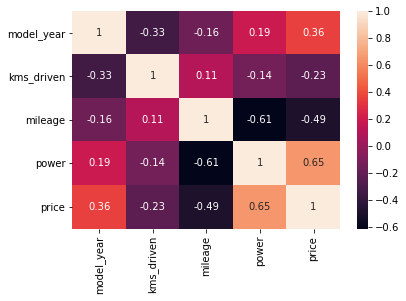

In [18]:
## Correlation

sns.heatmap(data=df.corr(),annot=True)

### 1.The model_year & price have negative correlation as it obvious that old model will sold far cheaper than latest model.
### 2. kms_driven & price have negative correlation, the more it is driven the less will be the re-sale value.
### 3. mileage & price have negative correlation, the more it has mileage the less will be the price asn vice versa.
### 4. power & price have good positive correlation, the price of the bike increases if the power is more.

### Let's see which model year's bikes are put for re-sale more

<AxesSubplot:xlabel='model_year', ylabel='count'>

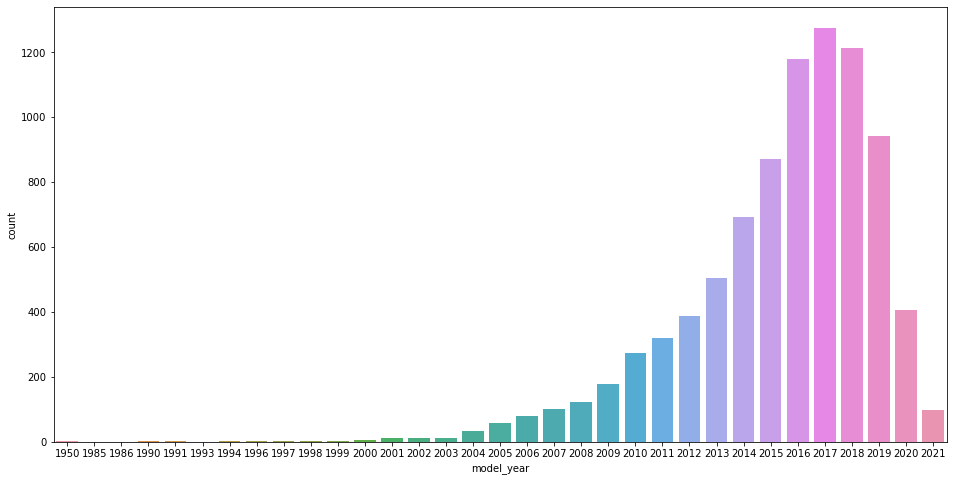

In [19]:
plt.figure(figsize=(16,8))
sns.countplot(x='model_year',data=df)

<AxesSubplot:xlabel='owner', ylabel='count'>

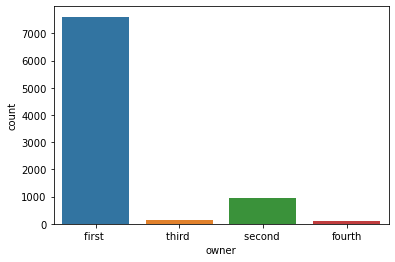

In [20]:
sns.countplot(x='owner',data=df)

Text(0.5, 1.0, 'Top 20 cities where used bikes are sold')

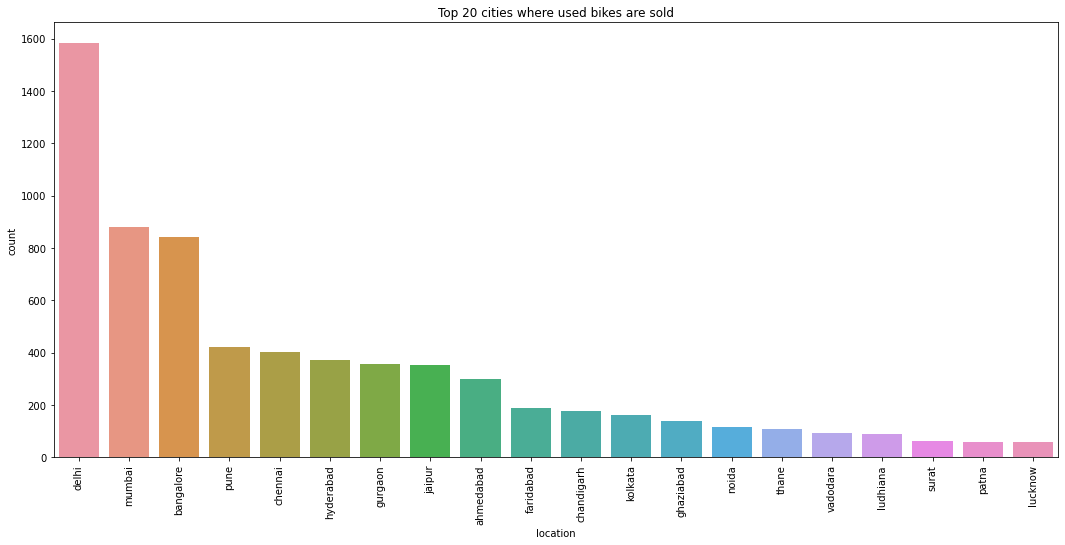

In [21]:
plt.figure(figsize=(18,8))
sns.countplot(x='location',data=df,order=df.location.value_counts().iloc[:20].index)
plt.xticks(rotation='vertical')
plt.title('Top 20 cities where used bikes are sold')

## People of Delhi sell more used bikes than any other cities/states

### Let's check the top 10 location with respect to the owner

<AxesSubplot:xlabel='location', ylabel='count'>

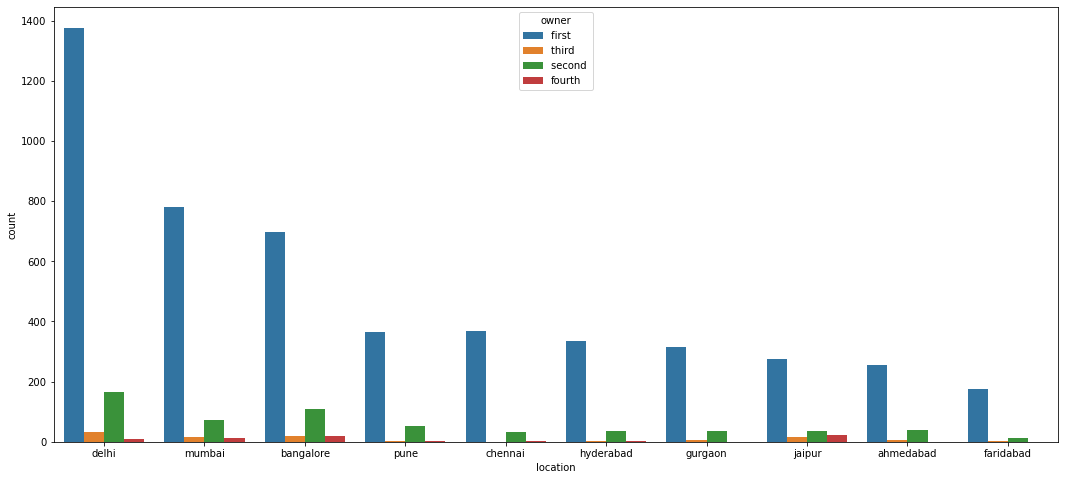

In [22]:
plt.figure(figsize=(18,8))
sns.countplot(x='location',hue='owner',data=df,order=df.location.value_counts().iloc[:10].index)

### In the top 10 cities the bike is sold by the first owner majorly,4th owner reseller are non existing in the major cities.